In [ ]:
!pip install datashader
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
import networkx as nx
import pandas as pd

import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import random_layout, circular_layout, forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle

from itertools import chain

import scipy
from networkx.readwrite import json_graph
import json

from google.colab import drive
drive.mount("/content/gdrive")

!pip install rdflib
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/PI_paper/kgbuilder')
from utils import *

from visuals import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59439 sha256=cdcb81c3f0a5f293d88982677a713af39adf4b04ac1b7a816b5527feff2d69c3
  Stored in directory: /root/.cache/pip/wheels/6d/79/c4/c425774559165f472d32e5ef592ff9a71179abb31f05dbc98b
Successfully built datashape
Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.3/500.3 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 4.3 MB/s eta 0:00:00


In [ ]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)
G = read_json_file("gdrive/MyDrive/Colab Notebooks/PI_paper/graph_crawler.json")

#  ideas from the internet

In [ ]:
sorted(nx.degree(G), key = lambda x: x[1], reverse=True)[:5]

[('http://wikiba.se/ontology#Item', 519),
 ('http://www.wikidata.org/entity/Q83158', 484),
 ('http://www.w3.org/2002/07/owl#DatatypeProperty', 441),
 ('http://www.wikidata.org/entity/Q4583', 434),
 ('http://www.wikidata.org/entity/Q61597', 212)]

let's chose jean cocteau (http://www.wikidata.org/entity/Q83158) wihich has a high degree centrality (the highest after the ontology).

Why is so ?

In [ ]:
G_cocteau = G.subgraph(G.neighbors('http://www.wikidata.org/entity/Q83158'))

In [ ]:
dfc_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      99 non-null     int64 
 1   Unnamed: 0.1    99 non-null     int64 
 2   Unnamed: 0.1.1  99 non-null     int64 
 3   node            99 non-null     object
 4   rdf_type        99 non-null     object
 5   is_wikidata     99 non-null     bool  
 6   itemLabel       99 non-null     object
 7   data_type       99 non-null     int64 
 8   degree          99 non-null     int64 
 9   to_keep         99 non-null     int64 
dtypes: bool(1), int64(6), object(3)
memory usage: 7.2+ KB


In [ ]:
df_edges = nx.to_pandas_edgelist(G_cocteau, nodelist=dfc_wiki["node"])

In [ ]:
df_edges.to_csv("/content/gdrive/MyDrive/Colab Notebooks/PI_paper/cocteau_edges.csv")

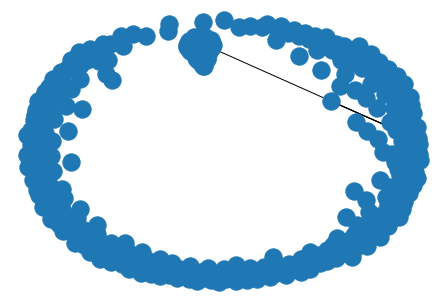

In [ ]:
nx.draw(G_cocteau)

In [ ]:
len(G_cocteau.nodes())

409

In [ ]:
df_big = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/PI_paper/nodes_from_crawler_with_labels.csv")

In [ ]:
dfc = df_big[df_big["node"].isin(list(G_cocteau.nodes()))]

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 19 to 3257
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   409 non-null    int64 
 1   node         409 non-null    object
 2   rdf_type     409 non-null    object
 3   is_wikidata  409 non-null    bool  
 4   itemLabel    99 non-null     object
dtypes: bool(1), int64(1), object(3)
memory usage: 16.4+ KB


In [ ]:
dfc

,Unnamed: 0,node,rdf_type,is_wikidata,itemLabel
19,19,http://www.wikidata.org/entity/Q6581097,<class 'str'>,True,male
85,85,http://wikiba.se/ontology#Item,<class 'str'>,False,NaN
129,129,http://www.wikidata.org/entity/Q33999,<class 'str'>,True,actor
150,150,http://www.wikidata.org/entity/Q36180,<class 'str'>,True,writer
184,184,http://www.wikidata.org/entity/Q36834,<class 'str'>,True,composer
...,...,...,...,...,...
3252,3252,coctejea,<class 'str'>,False,NaN
3254,3254,106862,<class 'str'>,False,NaN
3255,3255,184638,<class 'str'>,False,NaN
3256,3256,9148005,<class 'str'>,False,NaN


In [ ]:
def is_instanceof_subclass(wiki_code_data, wiki_code_class):
    ask_query = "ASK {<"+ wiki_code_data +"> p:P31 ?statement0. ?statement0 (ps:P31/(wdt:P279*)) "+ wiki_code_class +".}"
    endpoint_url = "https://query.wikidata.org/sparql"
    headers = {'User-Agent': 'MyBot'}
    payload = {
            'query': ask_query,
            'format': 'json'
        }
    try :
      r = requests.get(endpoint_url, params=payload, headers=headers, timeout=5)
      return r.json()['boolean']
    except  requests.exceptions.Timeout:
      print("the request timed out")
      return None
    

def is_geographic_entity(wiki_code_data, with_wd=False):
    if with_wd:
        code = wiki_code_data
    else : code = "wd:"+wiki_code_data
    return is_instanceof_subclass(code, "wd:Q27096213")

def is_person(wiki_code, with_wd=False):
    """from the wikipedia code returns whether the entity is a person or not"""
    if with_wd:
        code = wiki_code
    else : code = "wd:"+wiki_code
    ask_query = "ASK {<"+ code +"> wdt:P31 wd:Q5.}"
    endpoint_url = "https://query.wikidata.org/sparql"
    headers = {'User-Agent': 'MyBot'}
    payload = {
            'query': ask_query,
            'format': 'json'
        }
    try :
      r = requests.get(endpoint_url, params=payload, headers=headers, timeout=5)
      return r.json()['boolean']
    except  requests.exceptions.Timeout:
      print("the request timed out")
      return None
    

def is_temporal_entity(wiki_code_data, with_wd=False):
    if with_wd:
        code = wiki_code_data
    else : code = "wd:"+wiki_code_data
    return is_instanceof_subclass(code, "wd:Q26907166")

def is_group_of_human(wiki_code_data, with_wd=False):
    if with_wd:
        code = wiki_code_data
    else : code = "wd:"+wiki_code_data
    return is_instanceof_subclass(code, "wd:Q16334295")

class_value_to_type = ["not wikidata", "person", "geographic entity", "temporal entity", "group of humans", "other"]
def get_type_from_value(n):
    return class_value_to_type[n]

def get_code_from_iri(iri):
  value = 0       
  #get the wikicode
  found = False
  for num, funct in enumerate([is_person, is_geographic_entity, is_temporal_entity, is_group_of_human]):
      res = funct(iri, True)
      if not(res is None) and res:
          value = num + 1
          break
  return value
def conditioned_get_code_from_iri(row):
  if row["is_wikidata"]:
    return get_code_from_iri(row["node"])
  else : return -1

In [ ]:
dfc["is_wikidata"].value_counts()

False    310
True      99
Name: is_wikidata, dtype: int64

In [ ]:
dfc_wiki = dfc.loc[dfc["is_wikidata"]]

In [ ]:
dfc_wiki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 19 to 3093
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   99 non-null     int64 
 1   node         99 non-null     object
 2   rdf_type     99 non-null     object
 3   is_wikidata  99 non-null     bool  
 4   itemLabel    99 non-null     object
dtypes: bool(1), int64(1), object(3)
memory usage: 4.0+ KB


In [ ]:
dfc_wiki["class_code"] = dfc_wiki.apply(conditioned_get_code_from_iri, axis=1)

the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the reques

JSONDecodeError: ignored

In [ ]:
dfc_wiki.to_csv("/content/gdrive/MyDrive/Colab Notebooks/PI_paper/cocteau_neighbours_from_crawler_with_labels.csv")

In [ ]:
dfc_wiki = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/PI_paper/cocteau_neighbours_from_crawler_with_labels.csv")

In [ ]:
dfc_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    99 non-null     int64 
 1   Unnamed: 0.1  99 non-null     int64 
 2   node          99 non-null     object
 3   rdf_type      99 non-null     object
 4   is_wikidata   99 non-null     bool  
 5   itemLabel     99 non-null     object
dtypes: bool(1), int64(2), object(3)
memory usage: 4.1+ KB


In [ ]:
dfc_wiki["Unnamed: 0.1"].value_counts()

19      1
2693    1
2685    1
2666    1
2652    1
       ..
2429    1
2424    1
2413    1
2408    1
3093    1
Name: Unnamed: 0.1, Length: 99, dtype: int64

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'gdrive', 'sample_data']

In [ ]:
dfc_wiki = pd.read_csv("gdrive/MyDrive/Colab Notebooks/PI_paper/cocteau_wiki.csv")


In [ ]:
dfc_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    99 non-null     int64 
 1   Unnamed: 0.1  99 non-null     int64 
 2   node          99 non-null     object
 3   rdf_type      99 non-null     object
 4   is_wikidata   99 non-null     bool  
 5   itemLabel     99 non-null     object
 6   data_type     99 non-null     int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 4.9+ KB


In [ ]:
dfc_wiki["data_type"].value_counts()

2    38
1    22
0    22
4    12
3     5
Name: data_type, dtype: int64

In [ ]:
dfc_wiki["degree"] = dfc_wiki["node"].apply(lambda x : G.degree(x))

In [ ]:
dfc_wiki.to_csv("gdrive/MyDrive/Colab Notebooks/PI_paper/cocteau_wiki.csv")


In [ ]:
dfc_wiki= pd.read_csv("gdrive/MyDrive/Colab Notebooks/PI_paper/cocteau_wiki.csv")

In [ ]:
dfc_wiki

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,node,rdf_type,is_wikidata,itemLabel,data_type,degree,to_keep
0,0,19,19,http://www.wikidata.org/entity/Q6581097,<class 'str'>,True,male,1,17,0
1,1,129,129,http://www.wikidata.org/entity/Q33999,<class 'str'>,True,actor,1,12,1
2,2,150,150,http://www.wikidata.org/entity/Q36180,<class 'str'>,True,writer,1,15,1
3,3,184,184,http://www.wikidata.org/entity/Q36834,<class 'str'>,True,composer,1,8,0
4,4,191,191,http://www.wikidata.org/entity/Q5,<class 'str'>,True,human,1,32,1
...,...,...,...,...,...,...,...,...,...,...
94,94,2935,2935,http://www.wikidata.org/entity/Q3579810,<class 'str'>,True,Edouard Dermit,4,5,1
95,95,2937,2937,http://www.wikidata.org/entity/Q8454749,<class 'str'>,True,Category:Films directed by Jean Cocteau,0,6,0
96,96,3010,3010,http://www.wikidata.org/entity/Q5322166,<class 'str'>,True,designer,1,5,0
97,97,3054,3054,http://www.wikidata.org/entity/Q924335,<class 'str'>,True,Stedelijk Museum Amsterdam,2,5,0


In [ ]:
dfmygraph = (dfc_wiki.loc[dfc_wiki["to_keep"] == 1])[["node", "itemLabel", "data_type", "degree"]]
dfmygraph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 94
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   node       36 non-null     object
 1   itemLabel  36 non-null     object
 2   data_type  36 non-null     int64 
 3   degree     36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [ ]:
dfmygraph.to_csv("gdrive/MyDrive/Colab Notebooks/PI_paper/zoomedingraph.csv")

In [ ]:
myG = G.subgraph(["http://www.wikidata.org/entity/Q83158"] + list(dfmygraph["node"]))

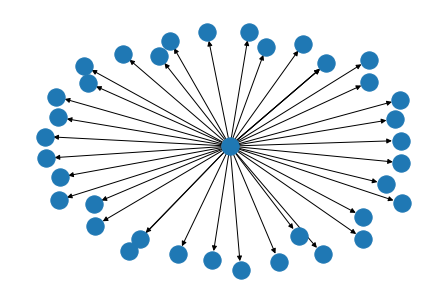

In [ ]:
nx.draw(myG)

In [ ]:
labels = dict({row["node"] : row["itemLabel"] for index, row in dfmygraph.iterrows()})
color_lookup = dict({row["node"] : row["data_type"] for index, row in dfmygraph.iterrows()})

AttributeError: ignored

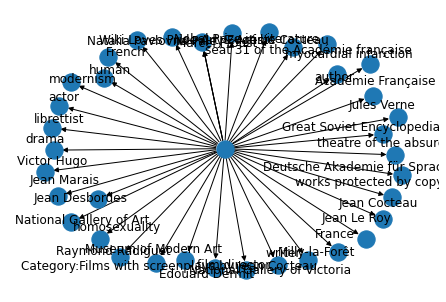

In [ ]:
nx.draw(myG, pos=nx.spring_layout(myG))
labelsG = nx.draw_networkx_labels(myG, pos=nx.spring_layout(myG), font_color='k', labels=labels)

now only chose nodes with high degree connectivity

In [ ]:
dfc_wiki= pd.read_csv("gdrive/MyDrive/Colab Notebooks/PI_paper/cocteau_wiki2.csv")
dfmygraph2 = (dfc_wiki.loc[dfc_wiki["to_keep2"] == 1])[["node", "itemLabel", "data_type", "degree"]]
myG2 = G.subgraph(["http://www.wikidata.org/entity/Q83158"] + list(dfmygraph2["node"]))

labels = dict({row["node"] : row["itemLabel"] for index, row in dfmygraph2.iterrows()})
color_lookup = dict({row["node"] : row["data_type"] for index, row in dfmygraph2.iterrows()})

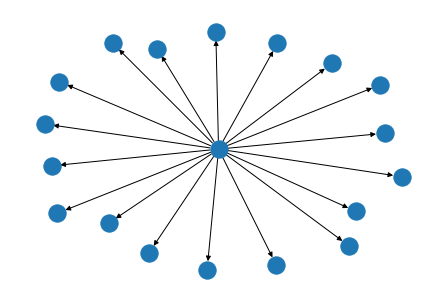

In [ ]:
nx.draw(myG2)

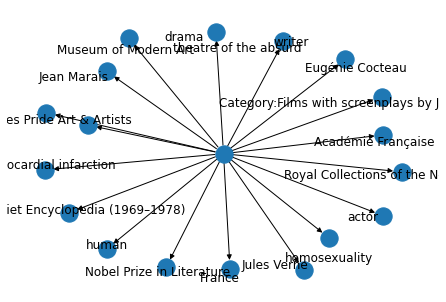

In [ ]:
nx.draw(myG2, pos=nx.spring_layout(myG2))
labelsG = nx.draw_networkx_labels(myG2, pos=nx.spring_layout(myG2), font_color='k', labels=labels)

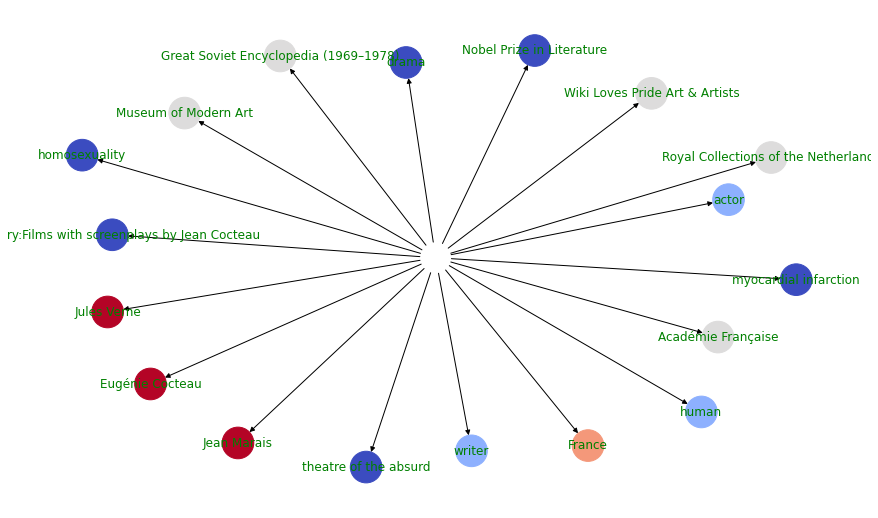

In [ ]:
pos = nx.spring_layout(myG2)
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

rcParams['figure.figsize'] = 12, 7

nx.draw(myG2, 
        nodelist=color_lookup,
        node_size=1000,
        pos = pos,
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()], 
        with_labels=False)
nx.draw_networkx_labels(myG2, font_color='g', pos= pos, labels=labels)
plt.show()

In [ ]:
print(json_graph(myG2))

TypeError: ignored

# get something more : more nodes not that much text

In [ ]:
myG3 = G.subgraph(["http://www.wikidata.org/entity/Q83158"] + list(dfc_wiki["node"]))
color_lookup = dict({row["node"] : row["data_type"] for index, row in dfc_wiki.iterrows()})

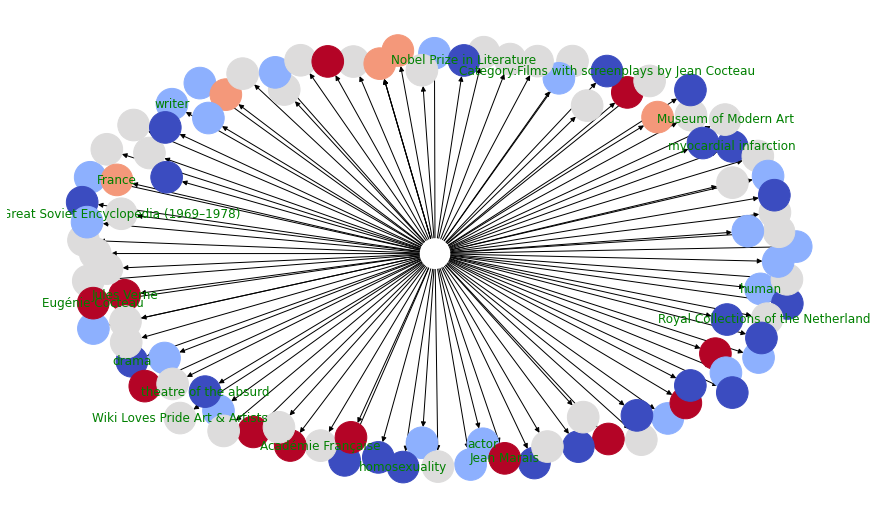

In [ ]:
pos = nx.spring_layout(myG3)
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

rcParams['figure.figsize'] = 12, 7

nx.draw(myG3, 
        nodelist=color_lookup,
        node_size=1000,
        pos = pos,
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()], 
        with_labels=False)
nx.draw_networkx_labels(myG3, font_color='g', pos= pos, labels=labels)
plt.show()

use color to show the values of degree

In [ ]:
dfc_wiki= pd.read_csv("gdrive/MyDrive/Colab Notebooks/PI_paper/cocteau_wiki2.csv")

In [ ]:
dfc_wiki = dfc_wiki.loc[dfc_wiki['to_keep2'] == 1]

In [ ]:
dfc_wiki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1 to 88
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      18 non-null     int64 
 1   Unnamed: 0.1    18 non-null     int64 
 2   Unnamed: 0.1.1  18 non-null     int64 
 3   node            18 non-null     object
 4   rdf_type        18 non-null     object
 5   is_wikidata     18 non-null     bool  
 6   itemLabel       18 non-null     object
 7   data_type       18 non-null     int64 
 8   degree          18 non-null     int64 
 9   to_keep         18 non-null     int64 
 10  to_keep2        18 non-null     int64 
dtypes: bool(1), int64(7), object(3)
memory usage: 1.6+ KB


In [ ]:
import numpy as np

In [ ]:
myG3 = G.subgraph(["http://www.wikidata.org/entity/Q83158"] + list(dfc_wiki["node"]))
color_lookup = dict({row["node"] : np.log(row["degree"]) for index, row in dfc_wiki.iterrows()})
labels = dict({row["node"] : row["itemLabel"] for index, row in dfc_wiki.iterrows()})


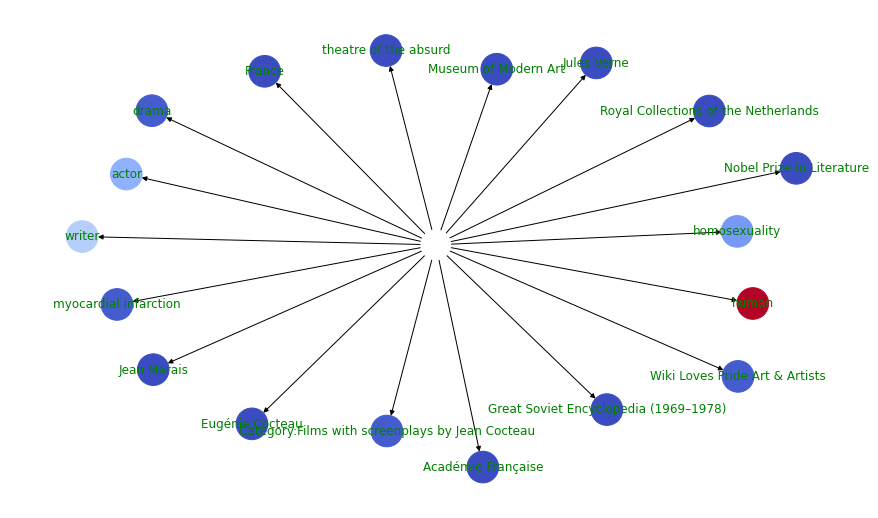

In [ ]:
pos = nx.spring_layout(myG3)
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

rcParams['figure.figsize'] = 12, 7

nx.draw(myG3, 
        nodelist=color_lookup,
        node_size=1000,
        pos = pos,
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()], 
        with_labels=False)
nx.draw_networkx_labels(myG3, font_color='g', pos= pos, labels=labels)
plt.show()

In [ ]:
myG3 = G.subgraph(["http://www.wikidata.org/entity/Q83158"] + list(dfc_wiki["node"]))
color_lookup = dict({row["node"] : np.log(row["degree"]) for index, row in dfc_wiki.iterrows()})
#color_lookup["http://www.wikidata.org/entity/Q83158"] = np.log(409)
labels = dict({row["node"] : row["itemLabel"] for index, row in dfc_wiki.iterrows()})

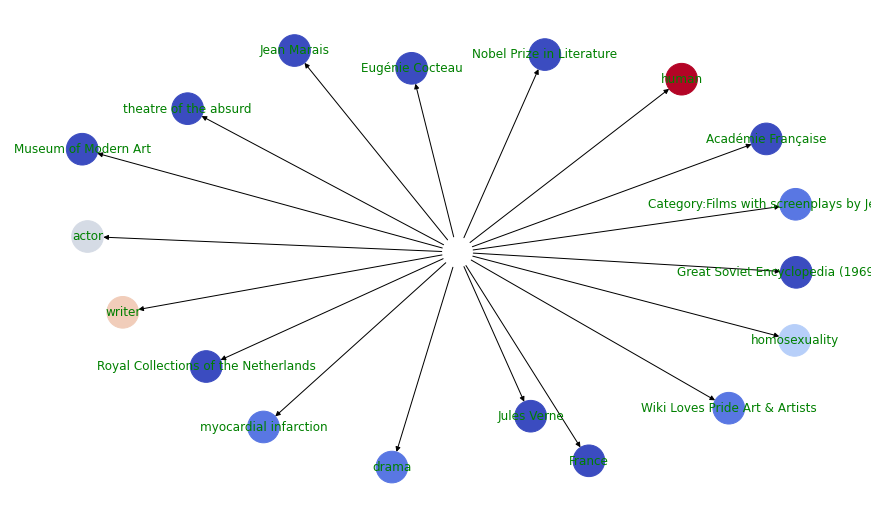

In [ ]:
pos = nx.spring_layout(myG3)
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

rcParams['figure.figsize'] = 12, 7

nx.draw(myG3, 
        nodelist=color_lookup,
        node_size=1000,
        pos = pos,
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()], 
        with_labels=False)
nx.draw_networkx_labels(myG3, font_color='g', pos= pos, labels=labels)
plt.show()

In [ ]:
dfc_wiki

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,node,rdf_type,is_wikidata,itemLabel,data_type,degree,to_keep,to_keep2
1,1,129,129,http://www.wikidata.org/entity/Q33999,<class 'str'>,True,actor,1,12,1,1
2,2,150,150,http://www.wikidata.org/entity/Q36180,<class 'str'>,True,writer,1,15,1,1
4,4,191,191,http://www.wikidata.org/entity/Q5,<class 'str'>,True,human,1,32,1,1
8,8,947,947,http://www.wikidata.org/entity/Q6636,<class 'str'>,True,homosexuality,0,10,1,1
10,10,1496,1496,http://www.wikidata.org/entity/Q25372,<class 'str'>,True,drama,0,6,1,1
16,16,2221,2221,http://www.wikidata.org/entity/Q64214265,<class 'str'>,True,Wiki Loves Pride Art & Artists,2,6,1,1
21,21,2376,2376,http://www.wikidata.org/entity/Q50632603,<class 'str'>,True,Royal Collections of the Netherlands,2,5,0,1
30,30,2429,2429,http://www.wikidata.org/entity/Q12152,<class 'str'>,True,myocardial infarction,0,6,1,1
35,35,2460,2460,http://www.wikidata.org/entity/Q33977,<class 'str'>,True,Jules Verne,4,5,1,1
36,36,2469,2469,http://www.wikidata.org/entity/Q161806,<class 'str'>,True,Académie Française,2,5,1,1
